# <center> End of Module Project </center>
----

## Loan Approval Prediction Project

This project aims to predict loan approval decisions based on applicant data such as age, income, employment history, and credit score using machine learning models like Logistic Regression, KNN, and SVM.

**Team Members:** 
<br> Aya ECHBANI EL IDRISSI - **II-CCN**, Mohammed EL HIMAR - **II-BDCC**, Reda EL KHAYATI - **II-BDCC**, Salah BOUDANS - **II-CCN**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

## 1. Data Overview

In [2]:
df = pd.read_csv('datasets/loan_approval.csv')

In [3]:
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [4]:
df.shape

(50000, 20)

In [5]:
# customer_id is a non-relevant feature here
df = df.drop(columns=['customer_id'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      50000 non-null  int64  
 1   occupation_status        50000 non-null  object 
 2   years_employed           50000 non-null  float64
 3   annual_income            50000 non-null  int64  
 4   credit_score             50000 non-null  int64  
 5   credit_history_years     50000 non-null  float64
 6   savings_assets           50000 non-null  int64  
 7   current_debt             50000 non-null  int64  
 8   defaults_on_file         50000 non-null  int64  
 9   delinquencies_last_2yrs  50000 non-null  int64  
 10  derogatory_marks         50000 non-null  int64  
 11  product_type             50000 non-null  object 
 12  loan_intent              50000 non-null  object 
 13  loan_amount              50000 non-null  int64  
 14  interest_rate         

In [7]:
df[['age', 'years_employed', 'annual_income', 'credit_score', 'credit_history_years', 'loan_amount', 'loan_to_income_ratio', 'payment_to_income_ratio']].describe()

,age,years_employed,annual_income,credit_score,credit_history_years,loan_amount,loan_to_income_ratio,payment_to_income_ratio
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,33041.874000,0.701999,0.233995
std,11.118603,7.612097,32630.501014,64.731518,7.207552,26116.185102,0.465788,0.155268
min,18.000000,0.000000,15000.000000,348.000000,0.000000,500.000000,0.008000,0.003000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,12300.000000,0.333000,0.111000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,26100.000000,0.622000,0.207000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,48500.000000,1.010250,0.337000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,100000.000000,2.001000,0.667000


In [8]:
df.duplicated().sum()

0

## 2. Exploratory Data Analysis

- **Target Variable Distribution**

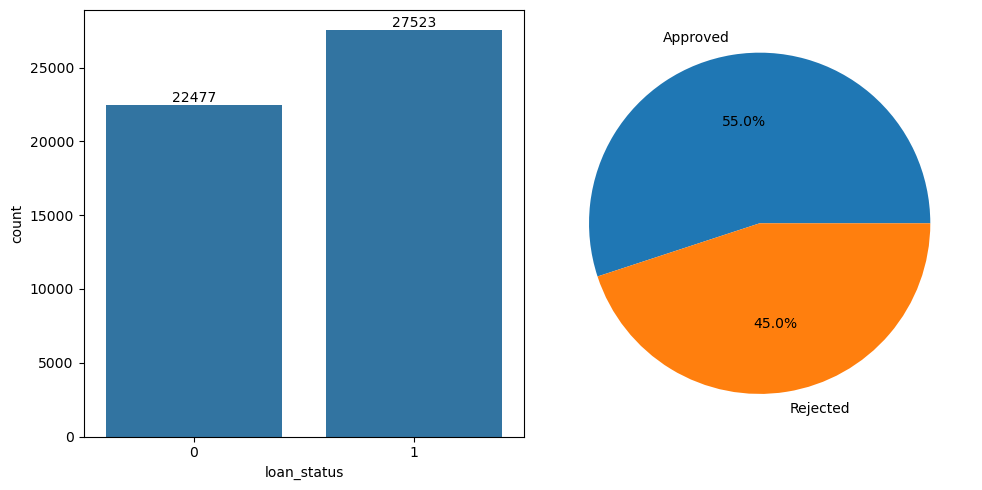

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='loan_status', data=df, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])

axes[1].pie(df['loan_status'].value_counts(), labels=['Approved', 'Rejected'], autopct='%1.1f%%')

plt.tight_layout()
plt.show()

We observe that our dataset is fairly balanced

- **Numerical Features Univariate Analysis**

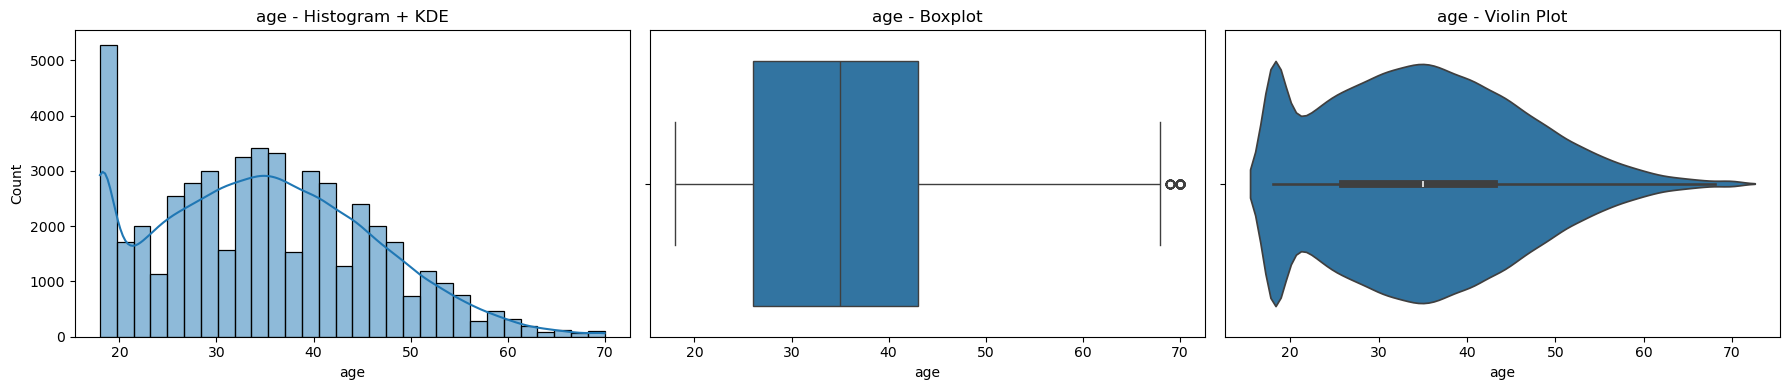

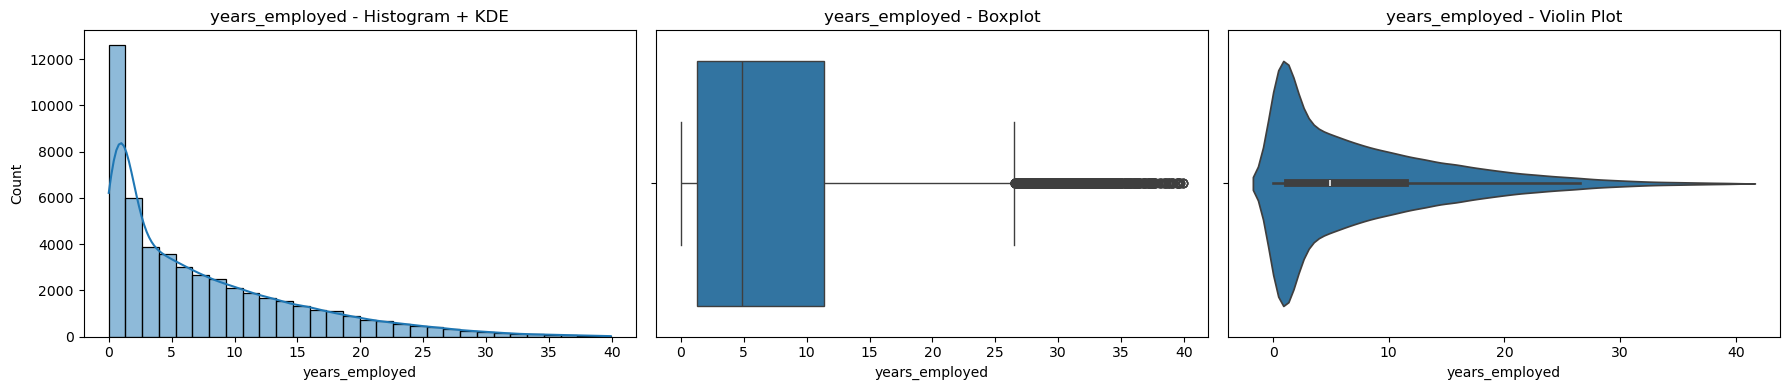

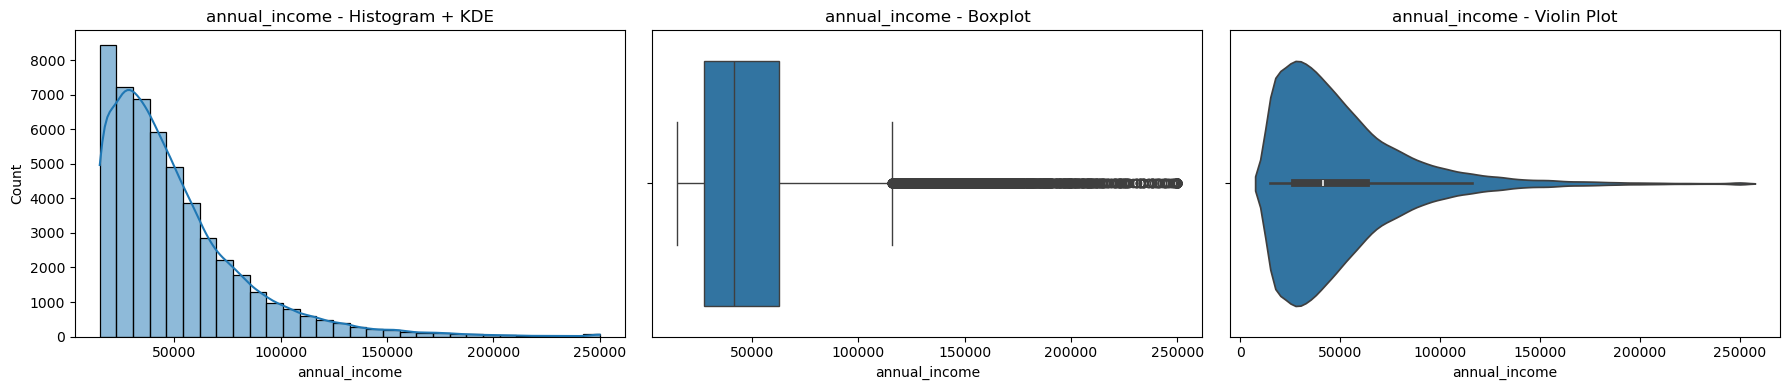

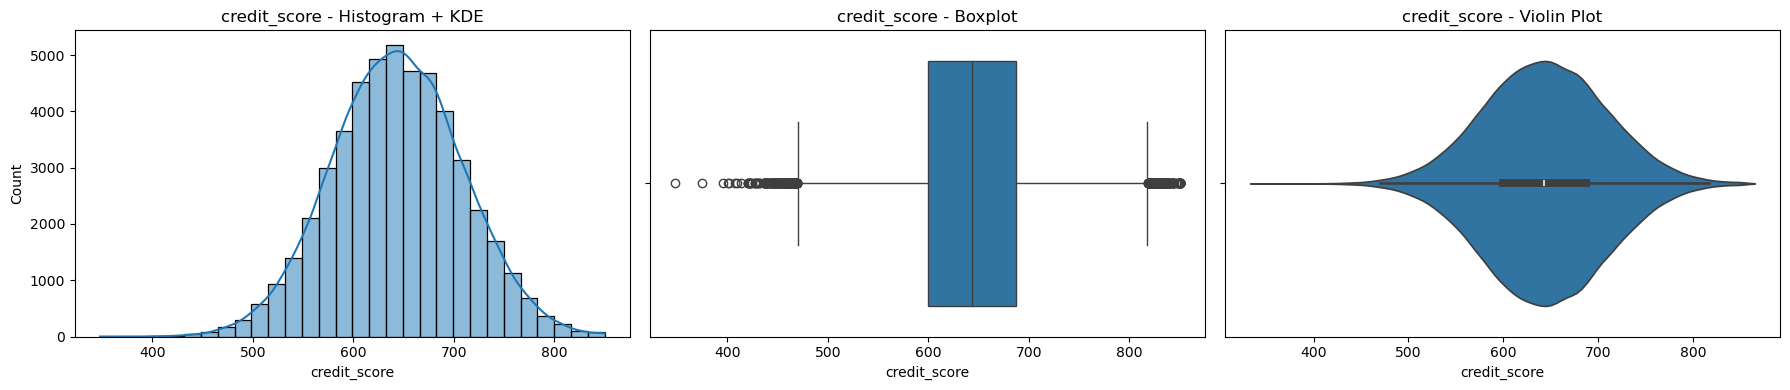

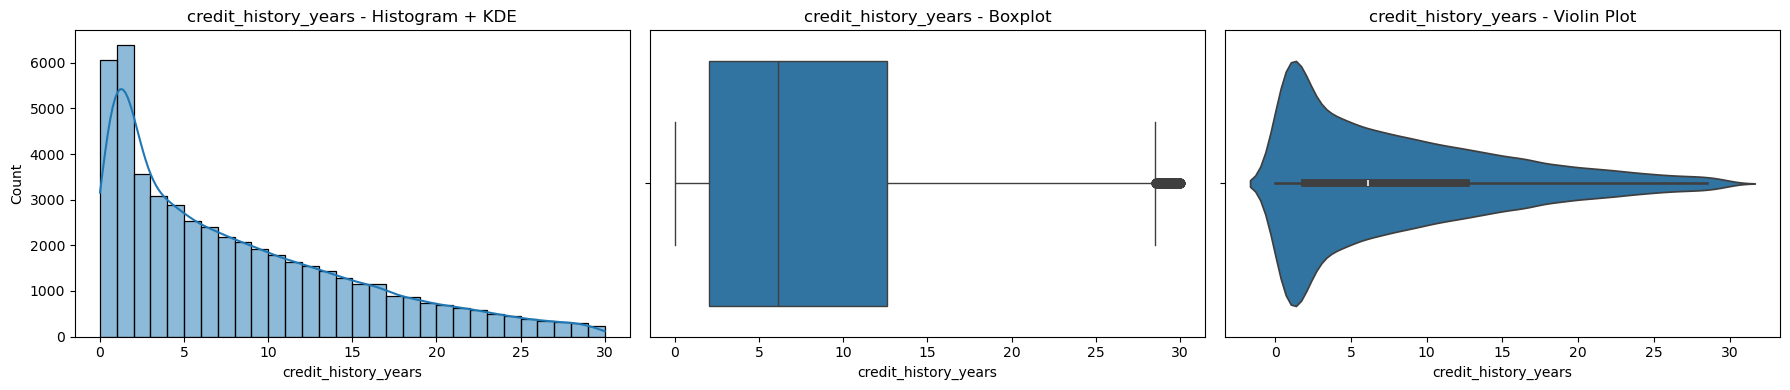

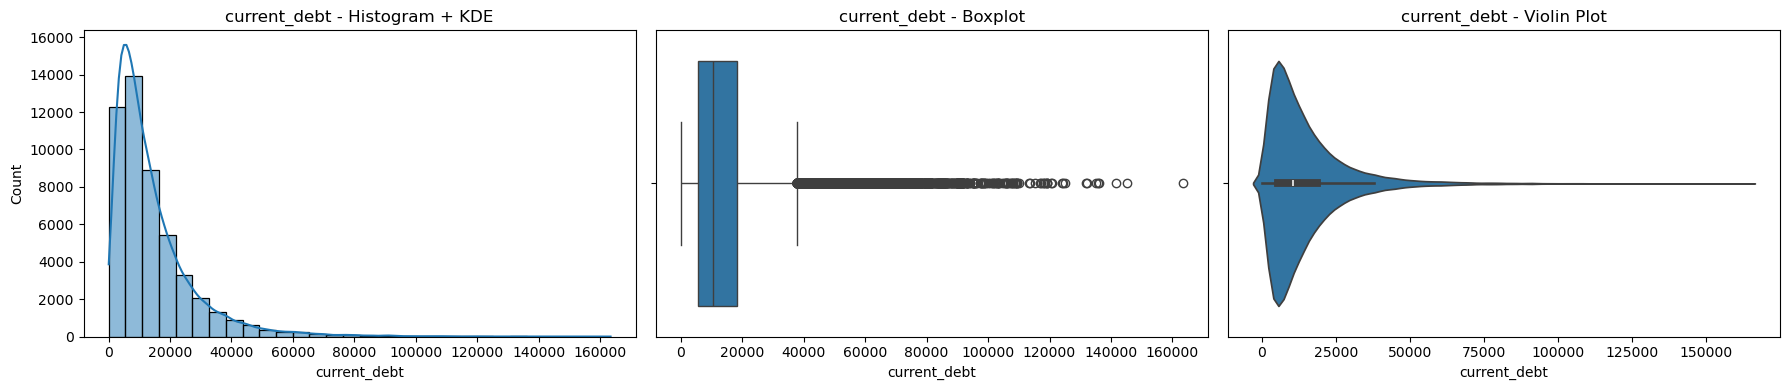

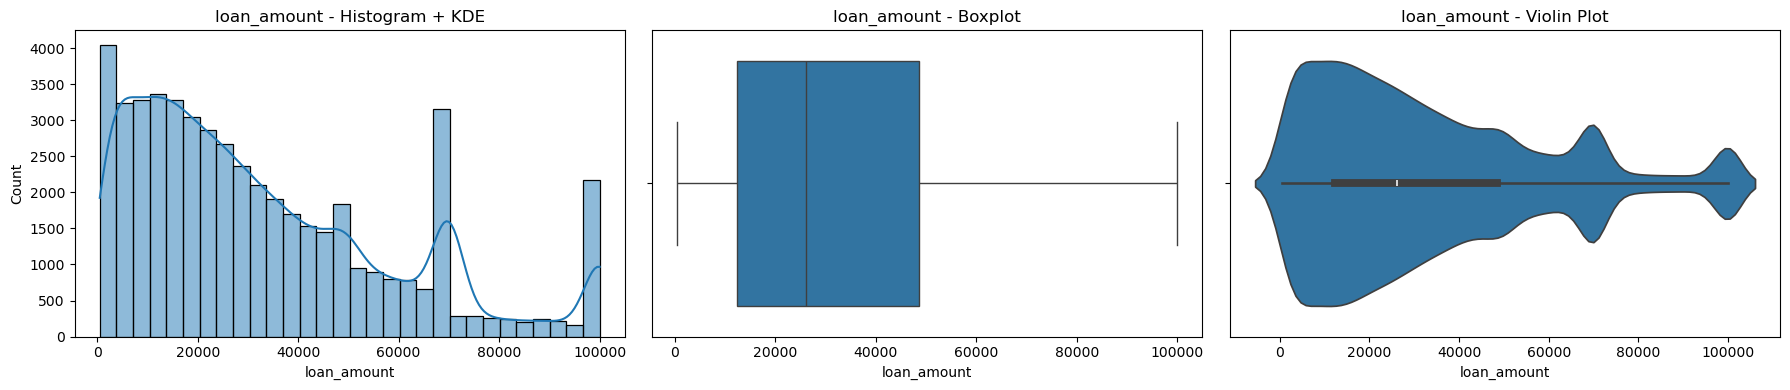

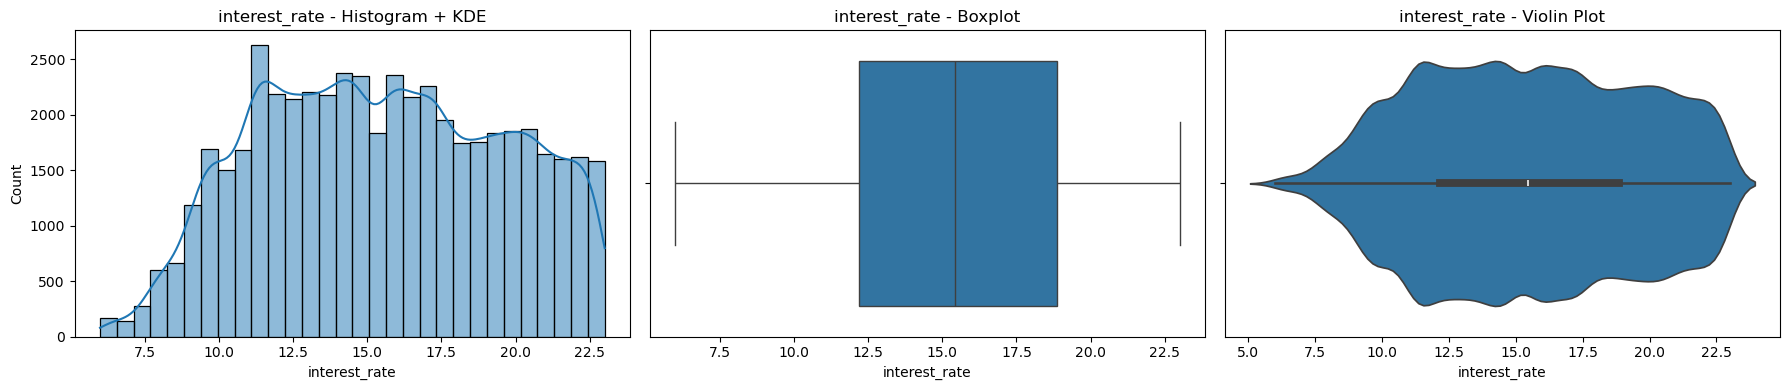

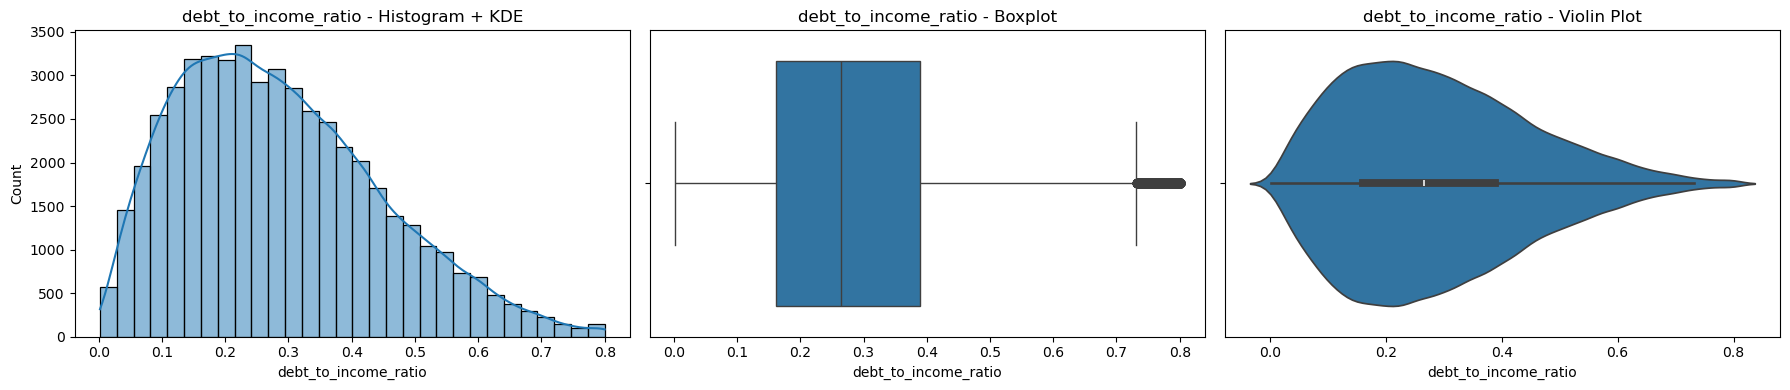

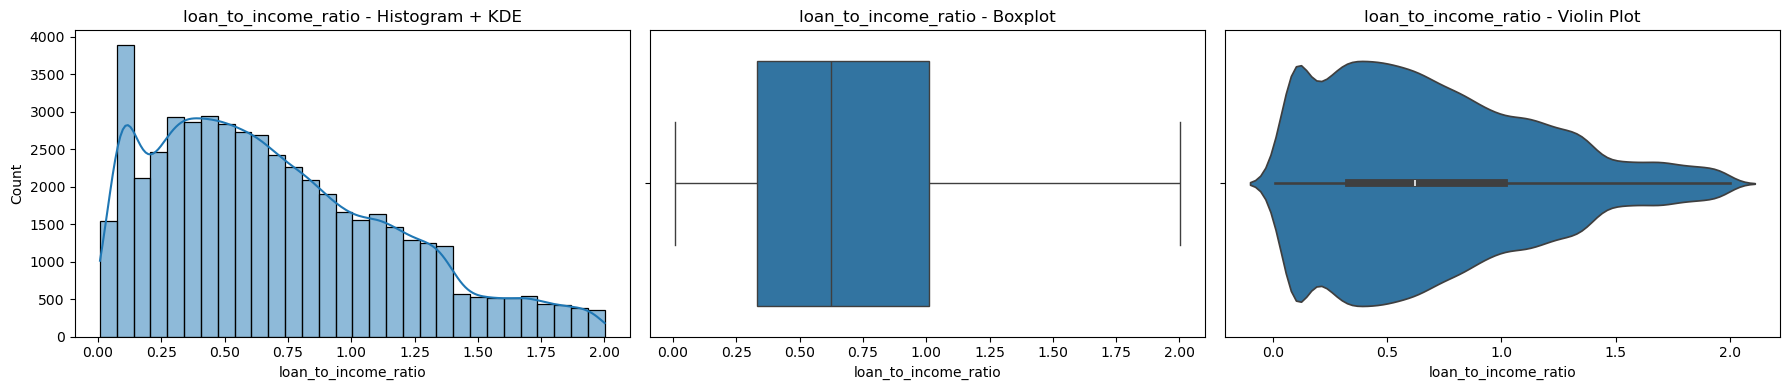

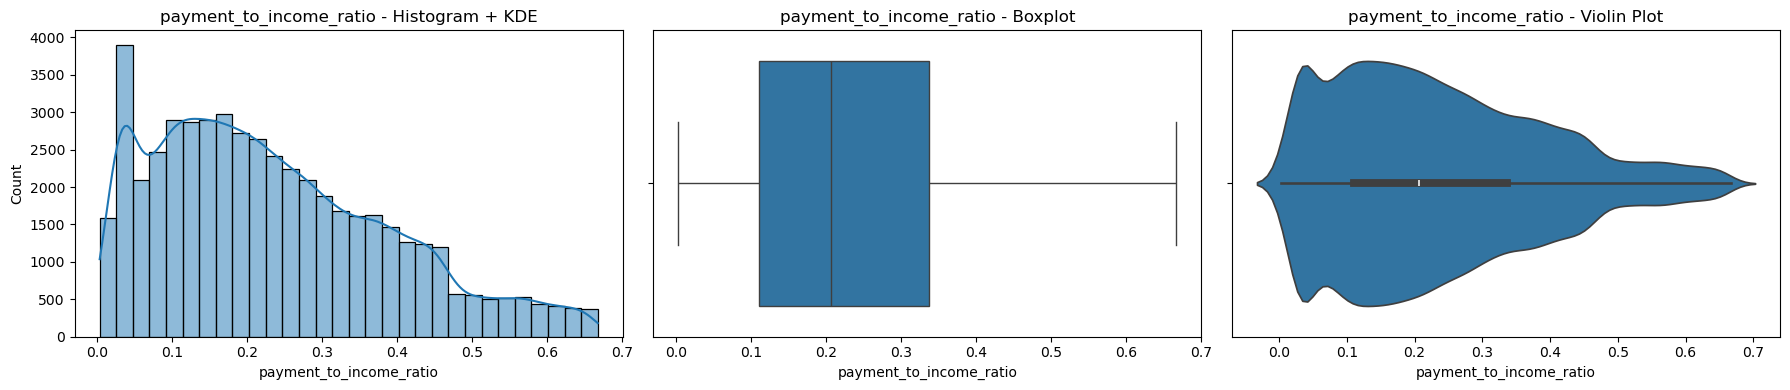

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['defaults_on_file', 'savings_assets', 'delinquencies_last_2yrs', 'derogatory_marks', 'loan_status']).columns

for col in numerical_cols:
    plt.figure(figsize=(18,4))
    
    # 1. Histogram + KDE
    plt.subplot(1,3,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} - Histogram + KDE")
    
    # 2. Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    
    # 3. Violin plot
    plt.subplot(1,3,3)
    sns.violinplot(x=df[col])
    plt.title(f"{col} - Violin Plot")
    
    plt.tight_layout()
    plt.savefig(f'{col}.png')
    plt.show()

* **Age** : Age is right skewed with a median around 35 and a secondary mode at 18, representing young applicants. Most applicants are between 25–45 years.
* **Credit Score** : Credit score is normally distributed, making it a strong predictive feature for approval without transformation.
* **Other Numerical Features** : Most other numeric variables (e.g., years of experience, income, ratios) are right-skewed. Extreme values exist but are meaningful, representing high-value applicants.

- **Occupation Status Distribution and Approval Rates**

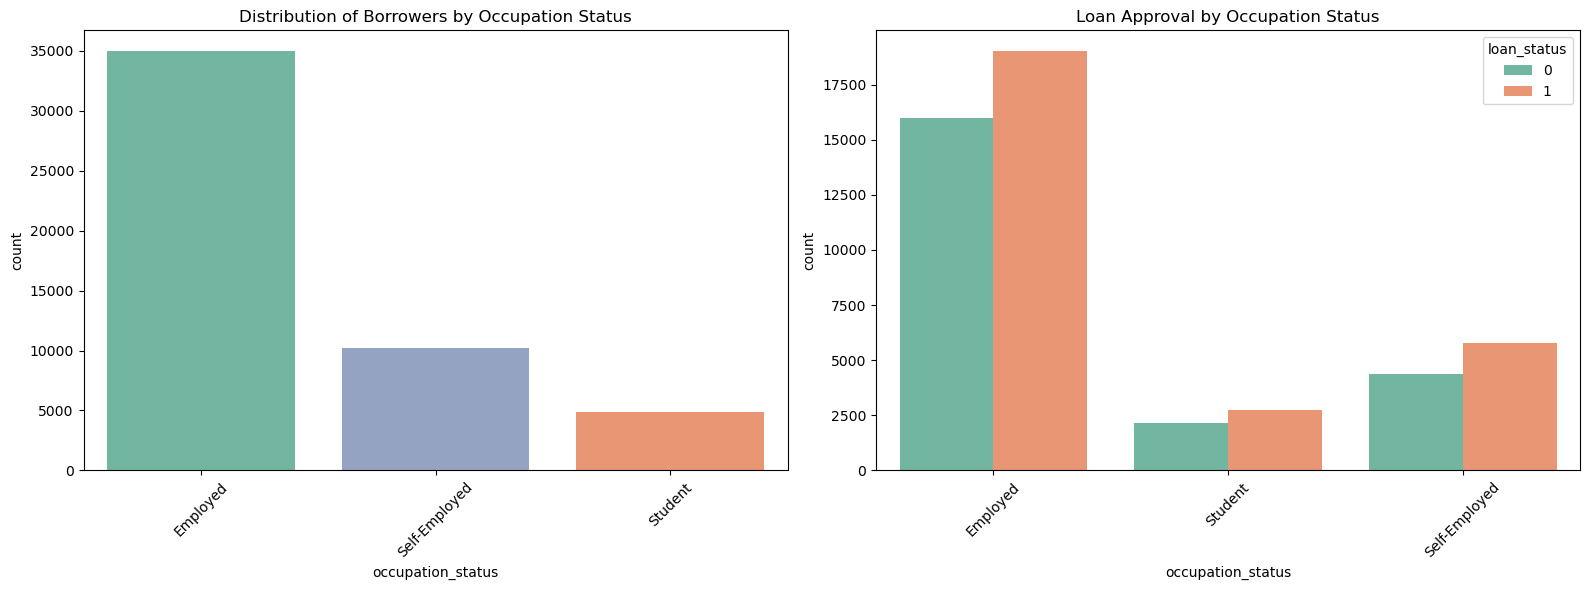

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Palettes
palette_counts = sns.color_palette("Set2", n_colors=df['occupation_status'].nunique())
palette_loan = sns.color_palette("Set2", n_colors=df['loan_status'].nunique())

# Plot 1
sns.countplot(
    data=df, 
    x='occupation_status',
    hue='occupation_status',
    legend=False,
    order=df['occupation_status'].value_counts().index,
    palette=palette_counts,
    ax=axes[0]
)
axes[0].set_title("Distribution of Borrowers by Occupation Status")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2
sns.countplot(
    data=df, 
    x='occupation_status', 
    hue='loan_status',
    palette=palette_loan,
    ax=axes[1]
)
axes[1].set_title("Loan Approval by Occupation Status")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [12]:
approval_rates = df.groupby('occupation_status')['loan_status'].mean().sort_values(ascending=False)
approval_rates

occupation_status
Self-Employed    0.569113
Student          0.561031
Employed         0.543565
Name: loan_status, dtype: float64

- Employees borrow more than self-employed and students combined
- Loan approval rates are fairly high (>50%) across all occupation groups.

- **Annual Income, Years of Experience vs Loan Outcome**

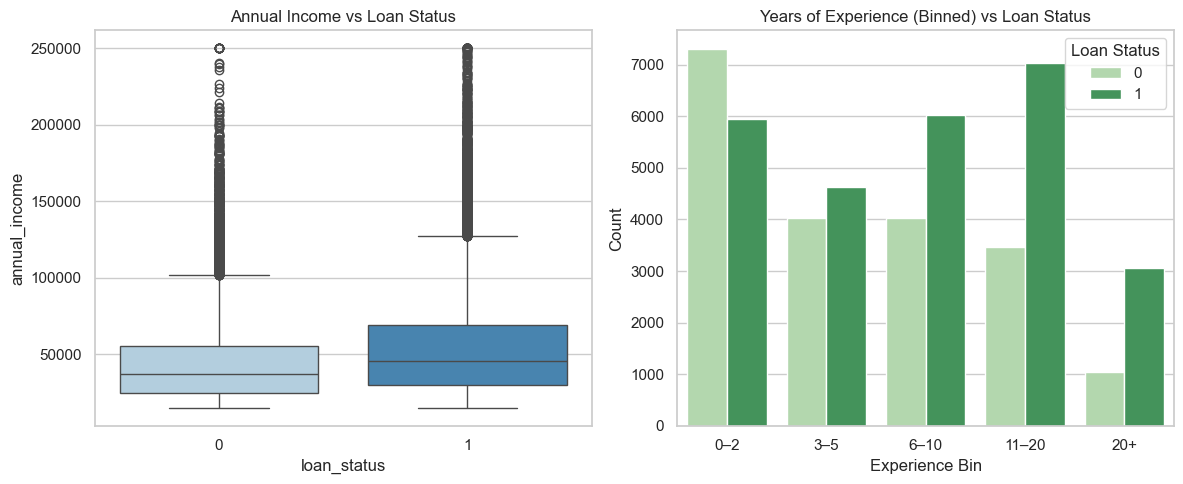

In [13]:
# --- Create bins for years of experience ---
bins = [0, 2, 5, 10, 20, 40]
labels = ["0–2", "3–5", "6–10", "11–20", "20+"]
df['experience_bin'] = pd.cut(df['years_employed'], bins=bins, labels=labels, right=True)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# ---- Boxplot for Annual Income ----
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df,
    x="loan_status",
    hue='loan_status',
    legend=False,
    y="annual_income",
    palette="Blues"
)
plt.title("Annual Income vs Loan Status")

# ---- Countplot for Experience Bins ----
plt.subplot(1, 2, 2)
sns.countplot(
    data=df,
    x="experience_bin",
    hue="loan_status",
    palette="Greens"
)
plt.title("Years of Experience (Binned) vs Loan Status")
plt.xlabel("Experience Bin")
plt.ylabel("Count")
plt.legend(title="Loan Status")

plt.tight_layout()
plt.show()

* The median annual income is roughly the same (~47k) for both approved and rejected applicants.
* The IQR is slightly wider for approved applicants, suggesting that approvals span a broader range of income levels.
----
* Applicants with 0–2 years of experience show a noticeably higher rejection rate, indicating that lack of experience negatively influences approval.
* In contrast, all other experience bins (3–5, 6–10, 11–20, 20+) exhibit higher approval counts.

- **Joint effect**

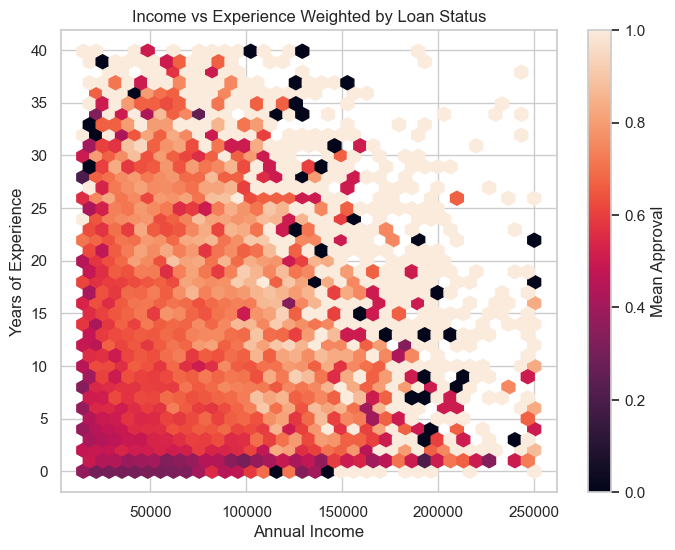

In [14]:
plt.figure(figsize=(8, 6))

hb = plt.hexbin(
    df['annual_income'],
    df['years_employed'],
    C=df['loan_status'],
    reduce_C_function=np.mean,
    gridsize=35
)

plt.colorbar(hb, label='Mean Approval')
plt.xlabel("Annual Income")
plt.ylabel("Years of Experience")
plt.title("Income vs Experience Weighted by Loan Status")

plt.show()

- **Loan to Income vs Loan Outcome**

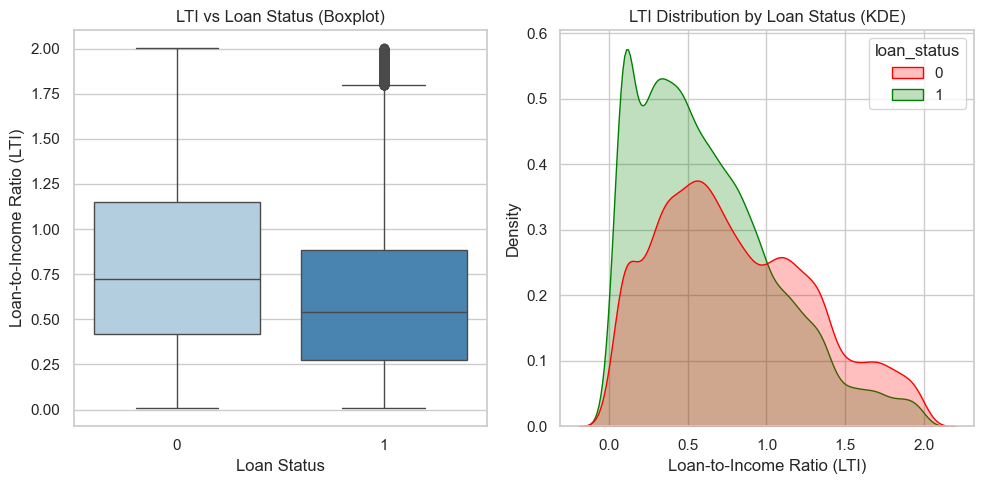

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))

# ---- Boxplot ----
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df,
    x='loan_status',
    hue='loan_status',
    legend=False,
    y='loan_to_income_ratio',
    palette='Blues'
)
plt.title("LTI vs Loan Status (Boxplot)")
plt.xlabel("Loan Status")
plt.ylabel("Loan-to-Income Ratio (LTI)")

# ---- KDE ----
plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df,
    x='loan_to_income_ratio',
    hue='loan_status',
    fill=True,
    palette={1:'green', 0:'red'}
)
plt.title("LTI Distribution by Loan Status (KDE)")
plt.xlabel("Loan-to-Income Ratio (LTI)")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

* Approved applicants have lower LTI (median ~0.55)

* Rejected applicants have higher LTI (median ~0.75), wider IQR, and dominate when LTI > 1.

- **Product type, Loan intent vs Loan Outcome**

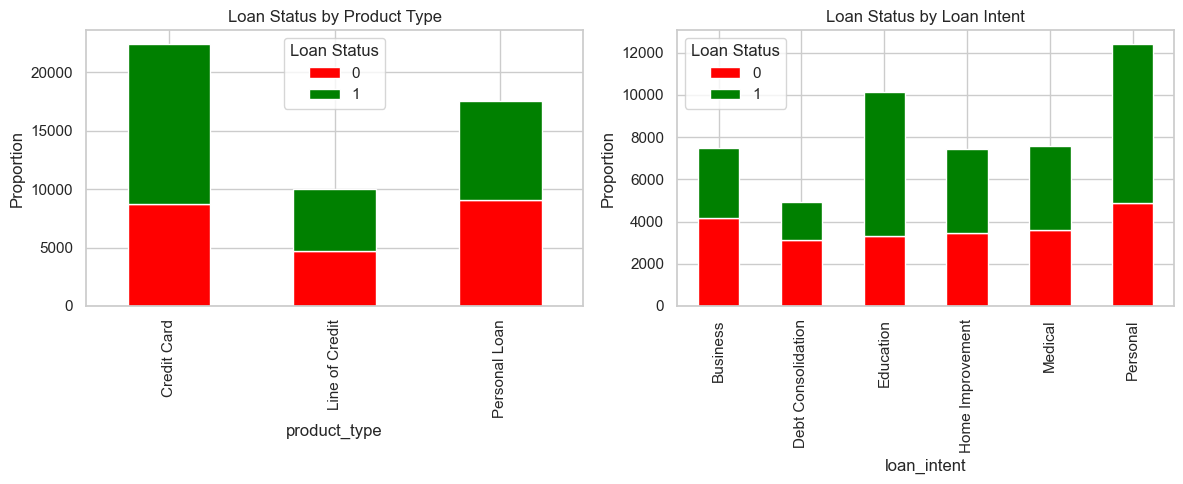

In [16]:
# --- Prepare proportion data ---
prop_product = df.groupby('product_type')['loan_status'].value_counts().unstack()
prop_intent = df.groupby('loan_intent')['loan_status'].value_counts().unstack()

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Product Type
prop_product.plot(kind='bar', stacked=True, ax=axes[0], color=['red','green'])
axes[0].set_title("Loan Status by Product Type")
axes[0].set_ylabel("Proportion")
axes[0].legend(title="Loan Status")

# Loan Intent
prop_intent.plot(kind='bar', stacked=True, ax=axes[1], color=['red','green'])
axes[1].set_title("Loan Status by Loan Intent")
axes[1].set_ylabel("Proportion")
axes[1].legend(title="Loan Status")

plt.tight_layout()
plt.show()

* Credit Card loans have the highest approval proportion among all product types.

* Business loans show a higher rejection rate, likely due to higher perceived risk.

* Education and Personal Debt loans have higher approval rates, indicating that lenders are more comfortable approving these purposes.

- **Correlation**

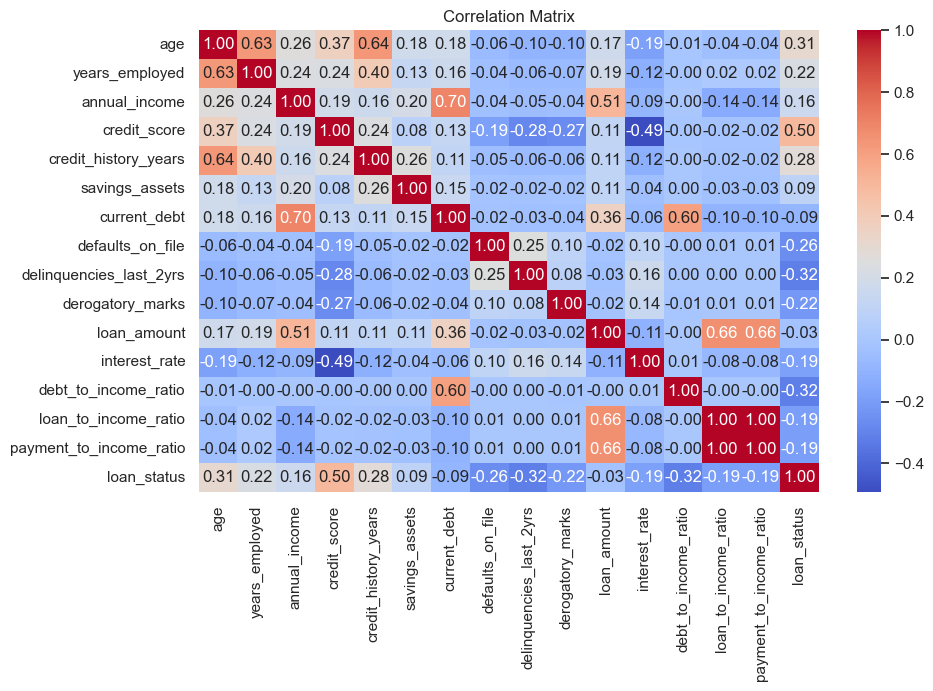

In [17]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='payment_to_income_ratio', ylabel='loan_to_income_ratio'>

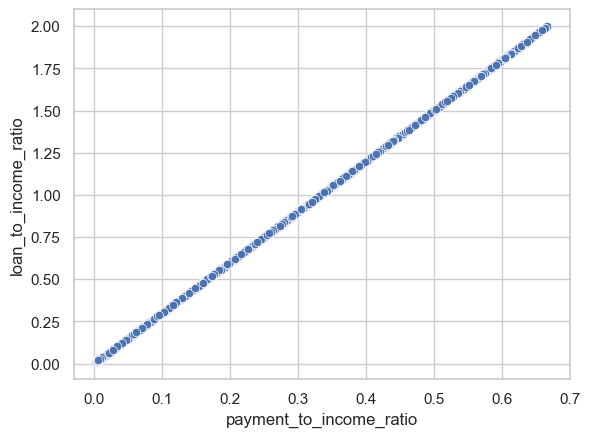

In [18]:
sns.scatterplot(x='payment_to_income_ratio', y='loan_to_income_ratio', data=df)

* Payment-to-income ratio is perfectly correlated with loan-to-income ratio, so we retain only LTI to avoid redundancy.

## 3. Data Preprocessing

- **Binning numeric features**

In [19]:
df['age_bin'] = pd.cut(df['age'], bins=[18,25,35,45,55,65,100],
                       labels=['18-25','26-35','36-45','46-55','56-65','65+'])

df['years_employed_bin'] = pd.cut(df['years_employed'], bins=[0,1,3,5,10,20,50],
                                  labels=['0-1','2-3','4-5','6-10','11-20','20+'])

df['credit_history_bin'] = pd.cut(df['credit_history_years'], bins=[0,1,3,5,10,20,50],
                                  labels=['0-1','2-3','4-5','6-10','11-20','20+'])

- **One-hot encoding**

In [20]:
categorical_cols = ['occupation_status', 'product_type', 'loan_intent',
                    'age_bin', 'years_employed_bin', 'credit_history_bin']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [21]:
df.head()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,...,years_employed_bin_2-3,years_employed_bin_4-5,years_employed_bin_6-10,years_employed_bin_11-20,years_employed_bin_20+,credit_history_bin_2-3,credit_history_bin_4-5,credit_history_bin_6-10,credit_history_bin_11-20,credit_history_bin_20+
0,40,17.2,25579,692,5.3,895,10820,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1,33,7.3,43087,627,3.5,169,16550,0,1,0,...,False,False,True,False,False,False,True,False,False,False
2,42,1.1,20840,689,8.4,17,7852,0,0,0,...,True,False,False,False,False,False,False,True,False,False
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,...,False,False,False,False,False,False,False,True,False,False
4,32,12.5,63657,630,7.2,209,12424,0,0,0,...,False,False,False,True,False,False,False,True,False,False


## 4. Prepare for Modeling

- **Data Split**

In [22]:
df.columns

Index(['age', 'years_employed', 'annual_income', 'credit_score',
       'credit_history_years', 'savings_assets', 'current_debt',
       'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks',
       'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status',
       'experience_bin', 'occupation_status_Self-Employed',
       'occupation_status_Student', 'product_type_Line of Credit',
       'product_type_Personal Loan', 'loan_intent_Debt Consolidation',
       'loan_intent_Education', 'loan_intent_Home Improvement',
       'loan_intent_Medical', 'loan_intent_Personal', 'age_bin_26-35',
       'age_bin_36-45', 'age_bin_46-55', 'age_bin_56-65', 'age_bin_65+',
       'years_employed_bin_2-3', 'years_employed_bin_4-5',
       'years_employed_bin_6-10', 'years_employed_bin_11-20',
       'years_employed_bin_20+', 'credit_history_bin_2-3',
       'credit_history_bin_4-5', 'credit_history_bin_6-10',
       'credit

In [26]:
X = df.drop(columns=['age', 'years_employed', 'experience_bin', 'credit_history_years', 'payment_to_income_ratio', 'loan_status'])
y = df['loan_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X.shape)
print(y.shape)
print(5*'-')
print(X_train.shape)
print(y_train.shape)
print(5*'-')
print(X_test.shape)
print(y_test.shape)

(50000, 35)
(50000,)
-----
(40000, 35)
(40000,)
-----
(10000, 35)
(10000,)


In [207]:
X_train.columns

Index(['annual_income', 'credit_score', 'savings_assets', 'current_debt',
       'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks',
       'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'occupation_status_Self-Employed',
       'occupation_status_Student', 'product_type_Line of Credit',
       'product_type_Personal Loan', 'loan_intent_Debt Consolidation',
       'loan_intent_Education', 'loan_intent_Home Improvement',
       'loan_intent_Medical', 'loan_intent_Personal', 'age_bin_26-35',
       'age_bin_36-45', 'age_bin_46-55', 'age_bin_56-65', 'age_bin_65+',
       'years_employed_bin_2-3', 'years_employed_bin_4-5',
       'years_employed_bin_6-10', 'years_employed_bin_11-20',
       'years_employed_bin_20+', 'credit_history_bin_2-3',
       'credit_history_bin_4-5', 'credit_history_bin_6-10',
       'credit_history_bin_11-20', 'credit_history_bin_20+'],
      dtype='object')

- **Data Scaling**

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)      

## 5. Data Modeling

- **Base Models**

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

trained_models=[]

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:,1] if hasattr(model, "predict_proba") else None
    
    trained_models.append(model)
    
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4495
           1       0.88      0.89      0.88      5505

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



--- SVM ---
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4495
           1       0.88      0.89      0.88      5505

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



--- KNN ---
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      4495
           1       0.79      0.91      0.84      5505

    accuracy                           0.81     10000
   macro avg       0.82      0.80      0.81     10000
weighted avg      

____

- **Handmade Models**

In [156]:
class LinearSVCScratch:
    def __init__(self, lr=0.001, n_iters=1000, C=None):
        """
        lr: learning rate
        n_iters: number of iterations
        C: regularization parameter. 
           C=None -> hard-margin, C>0 -> soft-margin
        """
        self.lr = lr
        self.n_iters = n_iters
        self.C = C
        self.w = None
        self.b = None
        self.fitted_ = False
        
    def fit(self, X, y):
        """
        X: array-like of shape (n_samples, n_features)
        y: array-like of shape (n_samples,) with values -1 or 1
        """
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # No misclassification
                    dw = self.w
                    db = 0
                else:
                    # Misclassified
                    if self.C is None:  # Hard-margin
                        dw = self.w - y_[idx] * x_i
                        db = -y_[idx]
                    else:  # Soft-margin
                        dw = self.w - self.C * y_[idx] * x_i
                        db = -self.C * y_[idx]

                # Gradient descent update
                self.w -= self.lr * dw
                self.b -= self.lr * db
        self.fitted_ = True
        return self

    def predict(self, X):
        if not self.fitted_:
            raise NotFittedError("This LinearSVM instance is not fitted yet.")
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

In [157]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.fitted_ = False

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.w) + self.b
            y_predicted = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights
            self.w -= self.lr * dw
            self.b -= self.lr * db
        self.fitted_ = True
        return self

    def predict_prob(self, X):
        if not self.fitted_:
            raise NotFittedError("This LogisticRegression instance is not fitted yet.")
        return self._sigmoid(np.dot(X, self.w) + self.b)

    def predict(self, X):
        probs = self.predict_prob(X)
        return np.where(probs >= 0.5, 1, 0)

In [158]:
class KNN_Scratch:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
        self.fitted_ = False

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.fitted_ = True
        return self

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        if not self.fitted_:
            raise NotFittedError("This KNN instance is not fitted yet.")
            
        y_pred = []

        for x in X:
            # Compute distances from x to all training points
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            # Get indices of k nearest neighbors
            k_idx = np.argsort(distances)[:self.k]
            # Voting
            k_neighbor_labels = [self.y_train[i] for i in k_idx]
            label = max(set(k_neighbor_labels), key=k_neighbor_labels.count)
            y_pred.append(label)

        return np.array(y_pred)


----

- **Data Pipelining**

In [159]:
from sklearn.pipeline import Pipeline

# Logistic Regression scratch pipeline
pipe_lr_scratch = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegressionScratch(lr=0.01, n_iters=1000))
])

# KNN scratch pipeline
pipe_knn_scratch = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNN_Scratch(k=15))
])

# Linear SVM scratch pipeline
pipe_svc_scratch = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVCScratch(lr=0.001, n_iters=1000, C=10))
])

In [161]:
# Train models
pipe_lr_scratch.fit(X_train, y_train)
pipe_knn_scratch.fit(X_train, y_train)
pipe_svc_scratch.fit(X_train, y_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


In [185]:
# Predictions and evaluation
y_pred_lr = pipe_lr_scratch.predict(X_test)
y_pred_knn = pipe_knn_scratch.predict(X_test)
y_pred_svc = pipe_svc_scratch.predict(X_test)

y_pred_svc_labels = np.where(y_pred_svc == -1, 0, 1)

# 6. Classification reports
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))

print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))

print("=== Linear SVM ===")
print(classification_report(y_test, y_pred_svc_labels))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4495
           1       0.86      0.89      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

=== KNN ===
              precision    recall  f1-score   support

           0       0.89      0.67      0.77      4495
           1       0.78      0.93      0.85      5505

    accuracy                           0.82     10000
   macro avg       0.83      0.80      0.81     10000
weighted avg       0.83      0.82      0.81     10000

=== Linear SVM ===
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4495
           1       0.85      0.88      0.86      5505

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg   

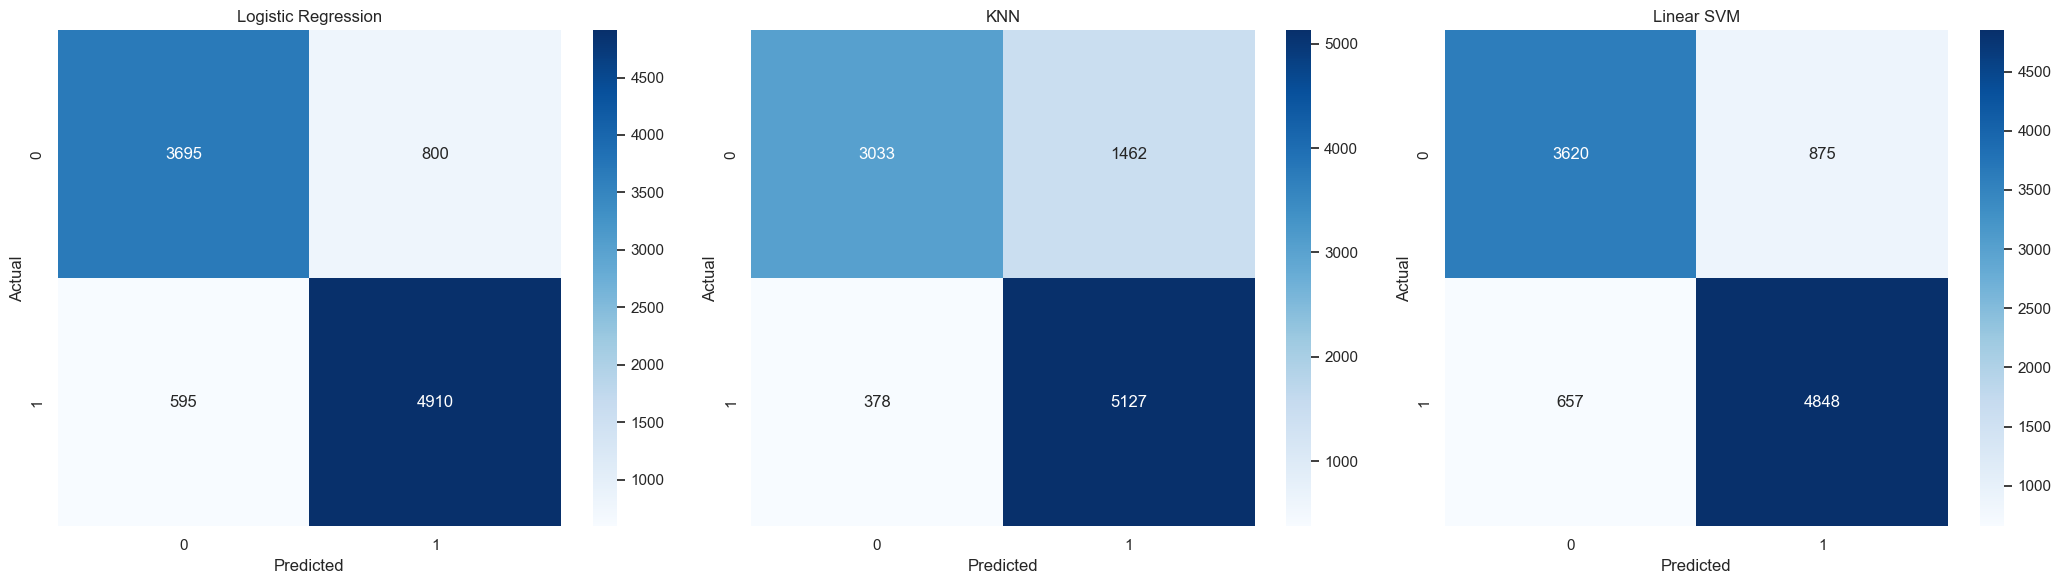

In [187]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

for ax, y_pred, title in zip(
    axes,
    [y_pred_lr, y_pred_knn, y_pred_svc_labels],
    ['Logistic Regression', 'KNN', 'Linear SVM']
):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

- **Dump our models**

In [188]:
import joblib

# Dump each pipeline to a file
joblib.dump(pipe_lr_scratch, 'pipeline_logistic.pkl')
joblib.dump(pipe_knn_scratch, 'pipeline_knn.pkl')
joblib.dump(pipe_svc_scratch, 'pipeline_svc.pkl')

print("Pipelines dumped successfully!")

Pipelines dumped successfully!
